# **SUICIDE RATES IN THE WORLD OVERVIEW (1985-2016)**

### Project that using technique to create barchart race to illustrate suicide rates in the world since 1985. Dataset that was used for this project can be found [here](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

**Define the columns:**

|Column|Definition|
|------|----------|
|country|*name of country*|
|year|*year that data was get from*|
|sex|*gender of person commited suicide*|
|age|*age of person commited suicide*|
|suicides_no|*number of suicide cases*|
|population|*population with above filtered conditions (country, year, sex, age)*|
|gdp_for_year ($)|*gpd of that country in particular year*|

#### **First of all, lets import necessary modules for our barchart race**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # In order to modify the ticks
import matplotlib.colors as mc # In order to set up the tranform color function
import matplotlib.animation as animation # In order to activate maplotlib FuncAnimation
import colorsys 
import re
from random import randint

In [2]:
data = pd.read_csv('suicide-rates-overview-1985-to-2016/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [4]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### **CALCULATE EXACT SUICIDE RATES BASED ON EACH COUNTRY'S TOTAL POPULATION**

In [6]:
data['country-year'] = data['country'] + pd.Series(['-']*data.shape[0]) + data['year'].astype(str)
total_pops = data.pivot_table(index='country-year',
                              values='population',
                              aggfunc='sum')['population'].to_dict()
def find_total_pop(name):
    return total_pops[name]
data['total_population'] = data['country-year'].apply(find_total_pop)
data['suicides/100k pop'] = data['suicides_no'] / data['total_population'] * 100000
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,total_population
0,Albania,1987,male,15-24 years,21,312900,0.775022,Albania-1987,NaN,"2,156,624,900",796,Generation X,2709600
1,Albania,1987,male,35-54 years,16,308000,0.590493,Albania-1987,NaN,"2,156,624,900",796,Silent,2709600
2,Albania,1987,female,15-24 years,14,289700,0.516681,Albania-1987,NaN,"2,156,624,900",796,Generation X,2709600
3,Albania,1987,male,75+ years,1,21800,0.036906,Albania-1987,NaN,"2,156,624,900",796,G.I. Generation,2709600
4,Albania,1987,male,25-34 years,9,274300,0.332152,Albania-1987,NaN,"2,156,624,900",796,Boomers,2709600


#### **Start with a test**

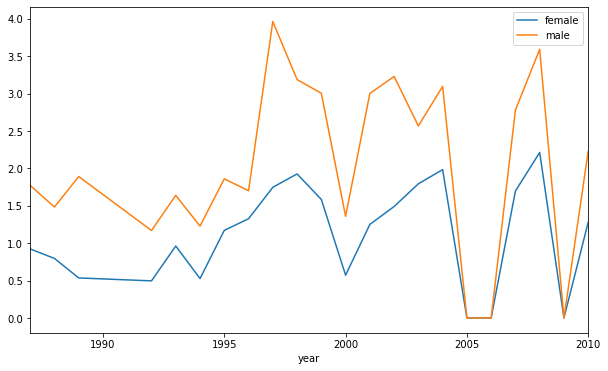

In [7]:
# Visualize the suicides rates in Albania
fig,ax = plt.subplots(figsize=(10,6))
albania_data = data[data['country']=='Albania'].pivot_table(index=['year','sex'],
                                                            values='suicides/100k pop',
                                                            aggfunc='sum').reset_index(level=0).reset_index(level=0)
albania_data = albania_data.pivot(index='year', columns='sex', values='suicides/100k pop')
albania_data['female'].plot(ax=ax, label='female')
albania_data['male'].plot(ax=ax, label='male')
plt.legend(loc='best')

### **CREATE THE INGREDIENTS FOR BARCHART RACE**

*1. Data to visualize*

*2. Colors to make visualization more legible*

*3. Interpolations to create smoother barchart race*

*4. Function to use to create frames when iterating within a list of parameters*

In [8]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation',
       'total_population'],
      dtype='object')

In [9]:
data_sum = data.pivot_table(index=['country','year'],
                            values=['suicides/100k pop'],
                            aggfunc='sum').reset_index(level=(0,1))
data_sum.head()

,country,year,suicides/100k pop
0,Albania,1987,2.694125
1,Albania,1988,2.279058
2,Albania,1989,2.425886
3,Albania,1992,1.665190
4,Albania,1993,2.600363


#### **CREATE THE COLORS TO VISUALIZE EACH COUNTRY**

In [10]:
# Create colors dictionary based on each country for later use
def transform_color(color, amount = 0.5):

    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

random_hex_colors = []
for i in range(len(data_sum['country'].unique())):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]
rgb_colors_light =[transform_color(i, 0.82) for i in random_hex_colors]

opacity_colors = dict(zip(data_sum['country'].unique(), rgb_colors_opacity))
dark_colors = dict(zip(data_sum['country'].unique(), rgb_colors_dark))
light_colors = dict(zip(data_sum['country'].unique(), rgb_colors_light))

#### **CREATE INTERPOLATION BY TRANSFORM DATASET**

In [11]:
# Transform data into wide form
data_pivot = data_sum.pivot(index='country', columns='year', values='suicides/100k pop').reset_index(level=0)
data_pivot.fillna(0, inplace=True)
data_pivot.head()

year,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,0.000000,0.000000,2.694125,2.279058,2.425886,0.000000,0.000000,1.665190,2.600363,...,4.475978,5.803285,0.000000,3.508740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,1.685374,0.000000,0.000000,1.579405,...,1.202921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088270,0.000000
2,Argentina,7.338285,8.383374,8.282789,8.315670,7.828723,7.356202,6.586099,7.269000,7.316873,...,8.112240,8.327544,7.761451,7.831615,7.659985,8.449141,7.686740,8.226282,7.740627,0.000000
3,Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,3.116935,2.476167,2.508538,3.148577,...,2.595681,2.068700,1.970484,2.727723,2.509019,2.807092,2.383778,2.069190,2.647268,2.791628
4,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.437573,4.218786,4.219632,7.367956,9.425268,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# Create interpolation (We can get rid of anything behind "^" with the regex later)
for p in range(4):
    i=0
    while i < len(data_pivot.columns):
        try:
            val = (data_pivot.iloc[:,i+1] + data_pivot.iloc[:,i+2]) /2
            data_pivot.insert(i+2, '{}^{}'.format(data_pivot.iloc[:,i+1].name, len(data_pivot.columns)), val)
        except:
            print('Interpolation No. {} done!'.format(p+1))
        i+=2

Interpolation No. 1 done!
Interpolation No. 2 done!
Interpolation No. 3 done!
Interpolation No. 4 done!


In [13]:
data_pivot.tail(3)

year,country,1985,1985^250,1985^126,1985^126^251,1985^64,1985^64^252,1985^64^127,1985^64^127^253,1985^33,...,2015^124^247^493,2015^63,2015^63^494,2015^63^248,2015^63^248^495,2015^63^125,2015^63^125^496,2015^63^125^249,2015^63^125^249^497,2016
98,United States,13.340703,13.372899,13.405095,13.437290,13.469486,13.501682,13.533878,13.566073,13.598269,...,8.283270,7.362906,6.442543,5.522180,4.601817,3.681453,2.761090,1.840727,0.920363,0.0
99,Uruguay,10.484401,10.422940,10.361478,10.300016,10.238555,10.177093,10.115632,10.054170,9.992708,...,11.106166,9.872148,8.638129,7.404111,6.170092,4.936074,3.702055,2.468037,1.234018,0.0
100,Uzbekistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [14]:
# Reshape data into long form
data_final = pd.melt(data_pivot, id_vars='country', var_name='year', value_name='suicide_rates')
data_final.tail()

,country,year,suicide_rates
50192,United Arab Emirates,2016,0.0
50193,United Kingdom,2016,0.0
50194,United States,2016,0.0
50195,Uruguay,2016,0.0
50196,Uzbekistan,2016,0.0


#### **CREATE FUNCTION THE CAN DRAWS BARCHART - AS A FRAME IN BARCHART RACE**

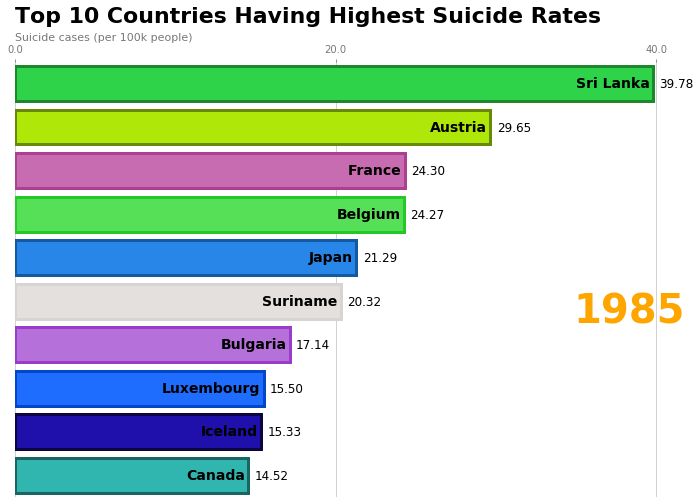

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
def draw_barh(year):
    df = data_final[data_final['year']==year].sort_values(by='suicide_rates').tail(10)
    dx = df['suicide_rates'].max()/200
    
    ax.clear()
    ax.barh(df['country'], df['suicide_rates'],
            color=[light_colors[country] for country in df['country']],
            edgecolor=[dark_colors[country] for country in df['country']], lw=3)
    ax.set_yticks([])
    ax.tick_params(colors='#777777', labelsize=10)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))
    ax.grid(axis='x', which='major', alpha=0.7)
    ax.set_axisbelow(True)
    ax.text(0, 1.05, 'Suicide cases (per 100k people)', transform=ax.transAxes, size=11, color='#777777')
    ax.margins(0.05, 0.01)
    for i, (country, value) in enumerate(zip(df['country'], df['suicide_rates'])):
        ax.text(value-dx, i-.1, country, size=14, weight='bold', ha='right')
        ax.text(value+2*dx, i-.1, '{:.2f}'.format(value), size=12, va='baseline')
    ax.text(0, 1.09, 'Top 10 Countries Having Highest Suicide Rates', transform=ax.transAxes, size=22, weight='bold')
    ax.text(1, 0.4, re.sub(r'\^(.*)', '', str(year)), transform=ax.transAxes, size=40, weight='bold', color='orange', ha='right')
    plt.box(False)
    plt.locator_params(axis='x', nbins=4)
draw_barh('1985^64^127')

#### LAST STEP: CREATE **FRAME LIST** & USING **MAPLOTLIB FUNCANIMATION** TO CREATE BARCHART RACE BASED ON ABOVE INGERDIENTS

In [16]:
frames_list = data_final['year'].unique().tolist()
for i in range(5):
    frames_list.append(data_final['year'].iloc[-1])
len(frames_list)

502

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ani = animation.FuncAnimation(fig, draw_barh, frames=frames_list, interval=200)
ani.save('suicide-rate.gif', fps=15, bitrate=1600)

### **2. VISUALIZE SUICIDE RATES BY GENDER**

In [18]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,total_population
0,Albania,1987,male,15-24 years,21,312900,0.775022,Albania-1987,NaN,"2,156,624,900",796,Generation X,2709600
1,Albania,1987,male,35-54 years,16,308000,0.590493,Albania-1987,NaN,"2,156,624,900",796,Silent,2709600
2,Albania,1987,female,15-24 years,14,289700,0.516681,Albania-1987,NaN,"2,156,624,900",796,Generation X,2709600
3,Albania,1987,male,75+ years,1,21800,0.036906,Albania-1987,NaN,"2,156,624,900",796,G.I. Generation,2709600
4,Albania,1987,male,25-34 years,9,274300,0.332152,Albania-1987,NaN,"2,156,624,900",796,Boomers,2709600


In [19]:
summary = data.pivot_table(index=['country-year','sex'],
                           values='suicides/100k pop',
                           aggfunc='sum').reset_index(level=(0,1))
summary.head()

,country-year,sex,suicides/100k pop
0,Albania-1987,female,0.922645
1,Albania-1987,male,1.771479
2,Albania-1988,female,0.795862
3,Albania-1988,male,1.483196
4,Albania-1989,female,0.535122


In [20]:
# Transform 'sex' into columns to split later
sum_sex = summary.pivot(index='country-year', columns='sex', values='suicides/100k pop')
sum_sex.tail()

sex,female,male
country-year,,
Uzbekistan-2010,1.765959,3.941247
Uzbekistan-2011,1.990142,4.322880
Uzbekistan-2012,2.331150,4.624395
Uzbekistan-2013,2.339885,4.925682
Uzbekistan-2014,2.526223,5.143975


#### **Split dataset into 2 parts (female & male) to insert interpolation for each**

In [21]:
sum_female = sum_sex['female'].reset_index(level=0)
sum_female['country'] = sum_female['country-year'].str.split('-').str[0]
sum_female['year'] = sum_female['country-year'].str.split('-').str[1]
sum_female.drop('country-year', axis=1, inplace=True)
sum_female.head()

,female,country,year
0,0.922645,Albania,1987
1,0.795862,Albania,1988
2,0.535122,Albania,1989
3,0.496014,Albania,1992
4,0.961778,Albania,1993


In [22]:
# Transform into wide form
pivot_female = sum_female.pivot(index='country', columns='year', values='female').reset_index(level=0)
pivot_female.head()

year,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,0.922645,0.795862,0.535122,NaN,NaN,0.496014,0.961778,...,1.696540,2.212503,0.000000,1.279228,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.088270,NaN
2,Argentina,1.985914,2.352777,2.485561,2.349159,2.111351,2.045299,1.684502,1.677461,1.617587,...,1.652187,1.663331,1.571667,1.506182,1.533575,1.633639,1.515732,1.749135,1.521425,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,0.971948,0.804754,0.574244,1.039625,...,0.731178,0.623894,0.371789,0.709955,0.599169,0.710656,0.853891,0.535135,0.679704,0.583325
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.054697,1.054697,0.000000,1.052565,2.094504,NaN,NaN,NaN,NaN,NaN


In [23]:
# Insert interpolations
for p in range(4):
    i=0
    while i < len(pivot_female.columns):
        try:
            val = (pivot_female.iloc[:,i+1] + pivot_female.iloc[:,i+2])/2
            pivot_female.insert(i+2, '{}^{}'.format(pivot_female.iloc[:,i+1].name, len(pivot_female.columns)), val)
        except:
            print('Interpolation No {} done!'.format(p+1))
        i+=2

Interpolation No 1 done!
Interpolation No 2 done!
Interpolation No 3 done!
Interpolation No 4 done!


In [24]:
pivot_female.tail(3)

year,country,1985,1985^250,1985^126,1985^126^251,1985^64,1985^64^252,1985^64^127,1985^64^127^253,1985^33,...,2015^124^247^493,2015^63,2015^63^494,2015^63^248,2015^63^248^495,2015^63^125,2015^63^125^496,2015^63^125^249,2015^63^125^249^497,2016
98,United States,2.857881,2.866438,2.874996,2.883553,2.892111,2.900668,2.909226,2.917784,2.926341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Uruguay,1.863082,1.875828,1.888573,1.901319,1.914065,1.926811,1.939557,1.952302,1.965048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Uzbekistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Transform into long form
female_df = pd.melt(pivot_female, id_vars='country', var_name='year', value_name='female_rate')
female_df.head()

,country,year,female_rate
0,Albania,1985,NaN
1,Antigua and Barbuda,1985,0.000000
2,Argentina,1985,1.985914
3,Armenia,1985,NaN
4,Aruba,1985,NaN


#### **Doing similarly to dataset for male**

In [26]:
sum_male = sum_sex['male'].reset_index(level=0)
sum_male['country'] = sum_male['country-year'].str.split('-').str[0]
sum_male['year'] = sum_male['country-year'].str.split('-').str[1]
sum_male.drop('country-year', axis=1, inplace=True)
sum_male.head()

,male,country,year
0,1.771479,Albania,1987
1,1.483196,Albania,1988
2,1.890764,Albania,1989
3,1.169176,Albania,1992
4,1.638585,Albania,1993


In [27]:
pivot_male = sum_male.pivot(index='country', columns='year', values='male').reset_index(level=0)
pivot_male.head()

year,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,1.771479,1.483196,1.890764,NaN,NaN,1.169176,1.638585,...,2.779438,3.590783,0.000000,2.229512,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,1.685374,0.000000,0.000000,1.579405,...,1.202921,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
2,Argentina,5.352371,6.030597,5.797227,5.966511,5.717372,5.310903,4.901597,5.591538,5.699286,...,6.460053,6.664213,6.189784,6.325433,6.126410,6.815502,6.171009,6.477146,6.219202,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,2.144988,1.671413,1.934294,2.108953,...,1.864503,1.444806,1.598694,2.017768,1.909851,2.096436,1.529888,1.534055,1.967564,2.208303
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.382876,3.164090,4.219632,6.315391,7.330764,NaN,NaN,NaN,NaN,NaN


In [28]:
for p in range(4):
    i=0
    while i < len(pivot_male.columns):
        try:
            val = (pivot_male.iloc[:,i+1] + pivot_male.iloc[:,i+2])/2
            pivot_male.insert(i+2, '{}^{}'.format(pivot_male.iloc[:,i+1].name, len(pivot_male.columns)), val)
        except:
            print('Interpolation No {} done!'.format(p+1))
        i+=2

Interpolation No 1 done!
Interpolation No 2 done!
Interpolation No 3 done!
Interpolation No 4 done!


In [29]:
pivot_male.head()

year,country,1985,1985^250,1985^126,1985^126^251,1985^64,1985^64^252,1985^64^127,1985^64^127^253,1985^33,...,2015^124^247^493,2015^63,2015^63^494,2015^63^248,2015^63^248^495,2015^63^125,2015^63^125^496,2015^63^125^249,2015^63^125^249^497,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,5.352371,5.39476,5.437149,5.479538,5.521927,5.564316,5.606706,5.649095,5.691484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.072887,2.087933,2.10298,2.118026,2.133072,2.148118,2.163164,2.178211,2.193257,2.208303
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
male_df = pd.melt(pivot_male, id_vars='country', var_name='year', value_name='male_rate')
male_df.head()

,country,year,male_rate
0,Albania,1985,NaN
1,Antigua and Barbuda,1985,0.000000
2,Argentina,1985,5.352371
3,Armenia,1985,NaN
4,Aruba,1985,NaN


In [31]:
female_df.head()

,country,year,female_rate
0,Albania,1985,NaN
1,Antigua and Barbuda,1985,0.000000
2,Argentina,1985,1.985914
3,Armenia,1985,NaN
4,Aruba,1985,NaN


#### **MERGE 2 DATAFRAME INTO 1 AFTER INSERTING ALL NECESSARY INTERPOLATIONS**

In [32]:
# Create new same columns to join on
male_df['country-year'] = male_df['country'] + pd.Series(['-']*male_df.shape[0]) + male_df['year']
female_df['country-year'] = female_df['country'] + pd.Series(['-']*female_df.shape[0]) + female_df['year']
sex_df = male_df.merge(female_df, on='country-year', how='left', suffixes=('_male','_female'))
sex_df.head()

,country_male,year_male,male_rate,country-year,country_female,year_female,female_rate
0,Albania,1985,NaN,Albania-1985,Albania,1985,NaN
1,Antigua and Barbuda,1985,0.000000,Antigua and Barbuda-1985,Antigua and Barbuda,1985,0.000000
2,Argentina,1985,5.352371,Argentina-1985,Argentina,1985,1.985914
3,Armenia,1985,NaN,Armenia-1985,Armenia,1985,NaN
4,Aruba,1985,NaN,Aruba-1985,Aruba,1985,NaN


In [33]:
# Rename DataFrame's columns & calculate necessary data
sex_df = sex_df[['country_male','year_male','male_rate','female_rate']]
sex_df.columns = ['country','year','male_rate','female_rate']
sex_df['suicide_rate'] = sex_df['male_rate'] + sex_df['female_rate']
sex_df.head()

,country,year,male_rate,female_rate,suicide_rate
0,Albania,1985,NaN,NaN,NaN
1,Antigua and Barbuda,1985,0.000000,0.000000,0.000000
2,Argentina,1985,5.352371,1.985914,7.338285
3,Armenia,1985,NaN,NaN,NaN
4,Aruba,1985,NaN,NaN,NaN


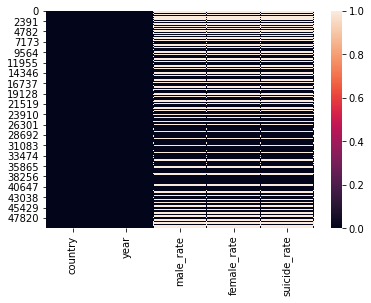

In [34]:
import seaborn as sns
sns.heatmap(sex_df.isnull())

#### **LAST STEP: CREATE FUNCTION THAT CAN BE USED TO CREATE FRAMES IN BARCHART RACE**

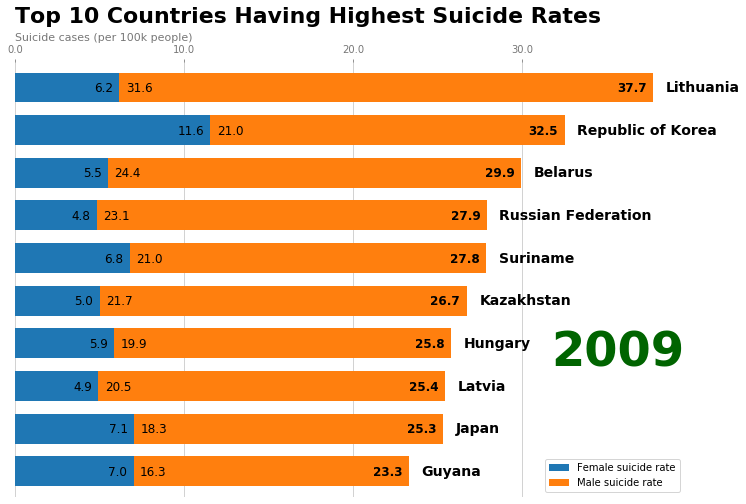

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
def draw_bar_bysex(year):
    df = sex_df[sex_df['year']==year].sort_values(by='suicide_rate', ascending=False).head(10)[::-1]
    dx = df['suicide_rate'].max()/100
    
    ax.clear()
    df.plot.barh(x='country', y=['female_rate','male_rate'], stacked=True, width=0.7, ax=ax,
                 label=['Female suicide rate','Male suicide rate'])
#                  color=[opacity_colors[country] for country in df['country']])
    ax.set_ylabel(None)
    ax.set_yticks([])
    ax.tick_params(colors='#777777', labelsize=10)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))
    ax.grid(axis='x', which='major', alpha=0.7)
    ax.set_axisbelow(True)
    ax.text(0, 1.05, 'Suicide cases (per 100k people)', transform=ax.transAxes, color='#777777', size=11)
    ax.text(0, 1.09, 'Top 10 Countries Having Highest Suicide Rates', transform=ax.transAxes, size=22, weight='bold')
    ax.text(1, 0.3, re.sub(r'\^(.*)', r'', year), transform=ax.transAxes, size=48, weight='bold', color='darkgreen', ha='right')
    for i, (country, female_rate, male_rate, suicide_rate) in enumerate(zip(df['country'],df['female_rate'],df['male_rate'],df['suicide_rate'])):
        ax.text(female_rate-dx, i-.1, '{:.1f}'.format(female_rate), size=12, ha='right')
        ax.text(female_rate+dx, i-.1, '{:.1f}'.format(male_rate), size=12)
        ax.text(suicide_rate-dx, i-.1, '{:.1f}'.format(suicide_rate), size=12, weight='bold', ha='right')
        ax.text(suicide_rate+2*dx, i-.1, country, size=14, weight='bold')
    ax.margins(0.05, 0)
    
    plt.box(False)
    plt.locator_params(axis='x', nbins=4)
    plt.legend(loc='lower right')
    
draw_bar_bysex('2009')

In [36]:
frames_sex = sex_df['year'].unique().tolist()
for i in range(10):
    frames_sex.append(sex_df['year'].iloc[-1])
len(frames_sex)

507

#### **(*) FUN THING:** CREATE BARCHART RACE ILLUSTRATING SUICIDES RATES BY COUNTRY AND GENDER USING XKCD STYLE

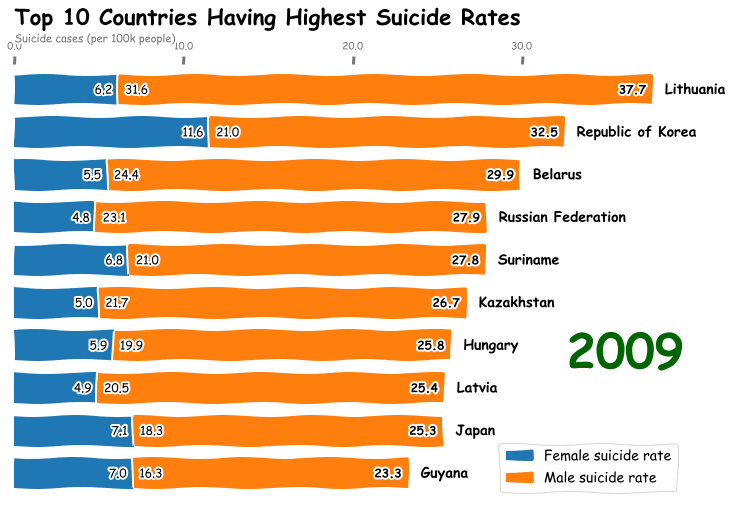

In [37]:
with plt.xkcd():
    fig,ax = plt.subplots(figsize=(12,8))
    draw_bar_bysex('2009')

In [ ]:
with plt.xkcd():
    fig,ax = plt.subplots(figsize=(12,8))
    animator = animation.FuncAnimation(fig, draw_bar_bysex, frames=frames_sex)
    animator.save('suicide-rates-bySex.gif', fps=15, bitrate=1800)